In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

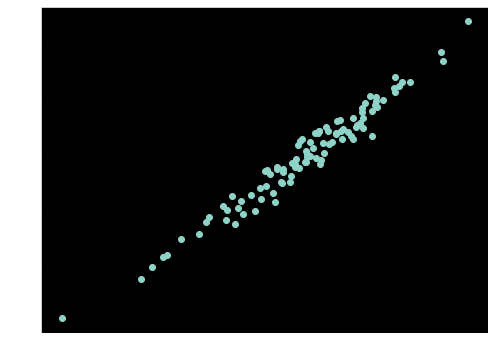

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
from phe import paillier
public_key,private_key=paillier.generate_paillier_keypair()

In [5]:
enc_X_train=[]
for i in X_train:
    row_x=[]
    for j in i:
        k=public_key.encrypt(j)
        row_x.append(k)
    enc_X_train.append(row_x)

In [6]:
enc_y_train=[]
for i in y_train:
    p=public_key.encrypt(i)
    enc_y_train.append(p)

In [7]:
n_samples,n_attributes=X_train.shape
n_samples,n_attributes

(80, 1)

In [8]:
var1=1/n_samples
bias=0
weights=[0]
lr=0.01
n_iters=1000

### fit function:

#### first iteration

y_pred = np.dot(X, self.weights) + self.bias

calculating np.dot(X,weights)

In [9]:
y_pred=[]
for i in enc_X_train:
    summation=0
    for j,k in zip(i,weights):
        p=j*k
        summation=summation+p
    summation=summation+bias
    y_pred.append(summation)

In [10]:
y_pred[:5]

In [11]:
for i in y_pred[:5]:
    print(private_key.decrypt(i))

0.0
0.0
0.0
0.0
0.0


calculating y_pred-enc_y_train:

In [12]:
y_train[:5]

array([ 4.72571035, 37.3033147 ,  9.84617977, -4.74696202, 46.61433976])

In [13]:
for i in enc_y_train[:5]:
    print(private_key.decrypt(i))

4.725710345773317
37.30331469641108
9.846179767820677
-4.746962016199478
46.61433976388177


In [14]:
enc_y_train_1=[]
for i in enc_y_train:
    p=i*(-1)
    enc_y_train_1.append(p)

In [15]:
for i in enc_y_train_1[:5]:
    print(private_key.decrypt(i))

-4.725710345773317
-37.30331469641108
-9.846179767820677
4.746962016199478
-46.61433976388177


res=y_pred-enc_y_train_1

In [16]:
res=[]
for i,j in zip(y_pred,enc_y_train_1):
    p=i+j
    res.append(p)

In [17]:
for i in res[:5]:
    print(private_key.decrypt(i))

-4.725710345773317
-37.30331469641108
-9.846179767820677
4.746962016199478
-46.61433976388177


#### decrypting res for dot product with X.T

In [18]:
res_decrypt=[]
for i in res:
    p=private_key.decrypt(i)
    # p=p*10
    res_decrypt.append(p)
    

In [19]:
res_decrypt[:5]

[-4.725710345773317,
 -37.30331469641108,
 -9.846179767820677,
 4.746962016199478,
 -46.61433976388177]

In [20]:
wei=[]
for i,j in zip(enc_X_train,res_decrypt):
    row_x=[]
    for k in i:
        p=k*j
        row_x.append(p)
    wei.append(row_x)

In [21]:
for i in wei[:5]:
    print(i)

#### calculating weights:

In [22]:
ww_a1=0
for i in wei:
    for j in i:
        ww_a1=ww_a1+j

In [23]:
var1

0.0125

In [24]:
dw=var1*ww_a1

In [25]:
private_key.decrypt(dw)

-90.57266136571002

In [26]:
dw=dw*lr
private_key.decrypt(dw)

-0.9057266136571002

In [27]:
dw=dw*(-1)
print(private_key.decrypt(dw))

0.9057266136571002


In [28]:
weights=weights[0]+dw
print(private_key.decrypt(weights))

0.9057266136571002


#### calculating bias:

In [29]:
res

In [30]:
res_decrypt

[-4.725710345773317,
 -37.30331469641108,
 -9.846179767820677,
 4.746962016199478,
 -46.61433976388177,
 88.56365940060468,
 23.05085118234159,
 -49.30980231741608,
 -187.11855380929865,
 -52.786807197281334,
 -100.63781242289222,
 -126.59136521598948,
 34.92302733961396,
 2.3950066527444704,
 91.54741374809039,
 1.3207517658702046,
 -44.66438206379091,
 -107.23095943601416,
 -45.285493623148426,
 289.1269962905116,
 -57.29982391705095,
 -132.790188401824,
 -41.806721080528945,
 -88.76973988610217,
 218.53325548357012,
 24.660355647314475,
 -241.89951822710918,
 10.132409561543517,
 46.42718116813931,
 -25.646184647964404,
 13.501425542707931,
 176.72441073222996,
 18.669433380972933,
 -50.56728840294356,
 -22.64343207088921,
 21.090225378595488,
 -64.92081241674168,
 64.87115988689979,
 31.486316788104272,
 138.96811402551222,
 -133.52911686728046,
 -122.17927891731159,
 53.50531413143085,
 -171.2598626058323,
 21.98254438776072,
 26.36081393261335,
 -20.504769345829203,
 10.681454326

In [31]:
sum=0
for i in res:
    sum=sum+i

In [32]:
sum

In [33]:
db_x=sum*(var1*(-1))
db_x

In [34]:
db=db_x*lr

In [35]:
bias=bias+db
print(private_key.decrypt(bias))

0.022853668059388148
